In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# FICHERO DE CREACIÓN DE GRÁFICAS PARA EL TFM 

## Resultados simulación PVWatts

In [7]:
df = pd.read_csv('dataset/pvwatts_monthly.csv')

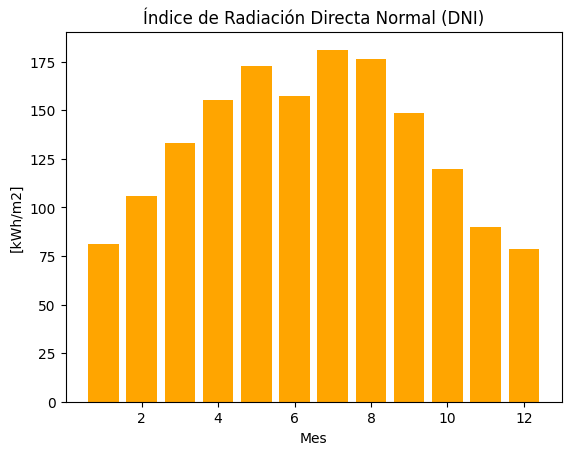

0      81.183932
1     105.719372
2     132.891955
3     155.057305
4     172.782909
5     157.494158
6     181.128296
7     176.187827
8     148.748192
9     119.505953
10     90.163570
11     78.613553
Name: Daily Average POA Irradiance (kWh/m2/day), dtype: float64


In [8]:
#conversión a valores mensuales de DNI (cos26)
df['Daily Average POA Irradiance (kWh/m2/day)'] = df['Daily Average POA Irradiance (kWh/m2/day)']*30/0.8987
 
plt.bar(df['Month'], df['Daily Average POA Irradiance (kWh/m2/day)'], color='orange')

plt.xlabel('Mes')
plt.ylabel('[kWh/m2]')
plt.title('Índice de Radiación Directa Normal (DNI)')

plt.show()
print(df['Daily Average POA Irradiance (kWh/m2/day)'])

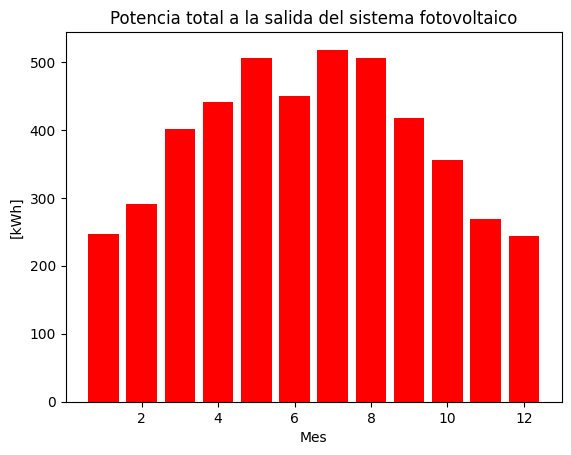

In [9]:
plt.bar(df['Month'], df['DC Array Output (kWh)'], color='red')

plt.xlabel('Mes')
plt.ylabel('[kWh]')
plt.title('Potencia total a la salida del sistema fotovoltaico')

plt.show()

## Representación all_loads.txt

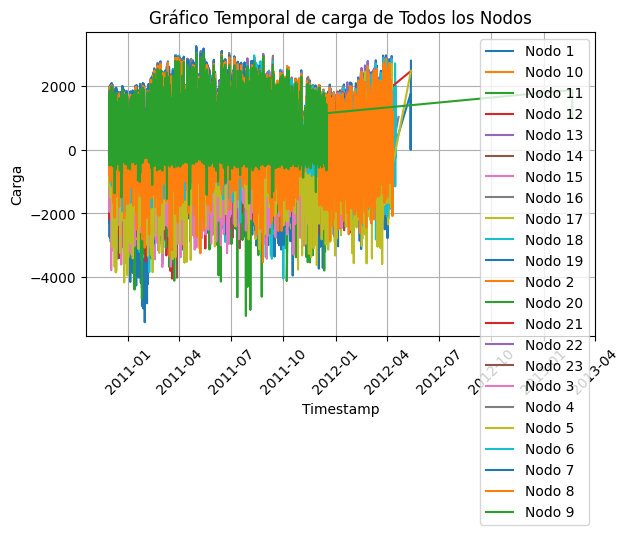

In [10]:
df = pd.read_csv('dataset/nodes/loads/all_loads.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])

for nodo in df['iid'].unique():
    datos_nodo = df[df['iid'] == nodo]
    plt.plot(datos_nodo['timestamp'], datos_nodo['dif'], label=f'Nodo {nodo}')


plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Carga')
plt.title('Gráfico Temporal de carga de Todos los Nodos')
plt.xticks(rotation=45)  
plt.grid(True)

plt.tight_layout() 
plt.show()

## Representación env+prod

In [71]:
df = pd.read_csv('dataset/env+prod.csv')
df['tmstp'] = pd.to_datetime(df['tmstp'])
df['datetime'] = pd.to_datetime(df['datetime'])

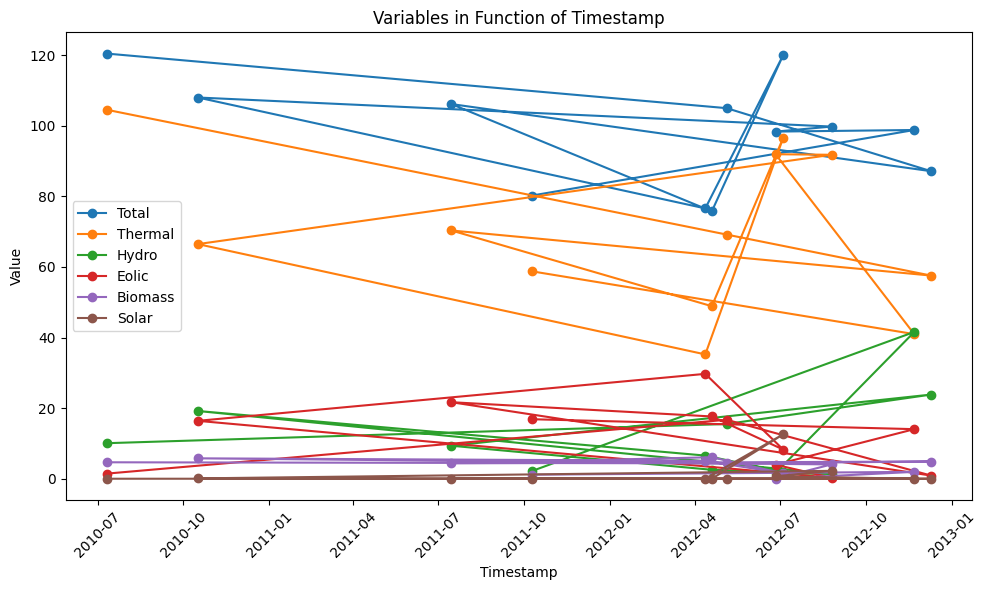

In [51]:
df_sorted = df.sort_values(by='tmstp')
df_sampled = df_sorted.sample(frac=0.0001, replace=False)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_sampled['tmstp'], df_sampled['total'], label='Total', marker='o', linestyle='-')
ax.plot(df_sampled['tmstp'], df_sampled['thermal'], label='Thermal', marker='o', linestyle='-')
ax.plot(df_sampled['tmstp'], df_sampled['hydro'], label='Hydro', marker='o', linestyle='-')
ax.plot(df_sampled['tmstp'], df_sampled['eolic'], label='Eolic', marker='o', linestyle='-')
ax.plot(df_sampled['tmstp'], df_sampled['biomass'], label='Biomass', marker='o', linestyle='-')
ax.plot(df_sampled['tmstp'], df_sampled['solar'], label='Solar', marker='o', linestyle='-')

ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Variables in Function of Timestamp')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

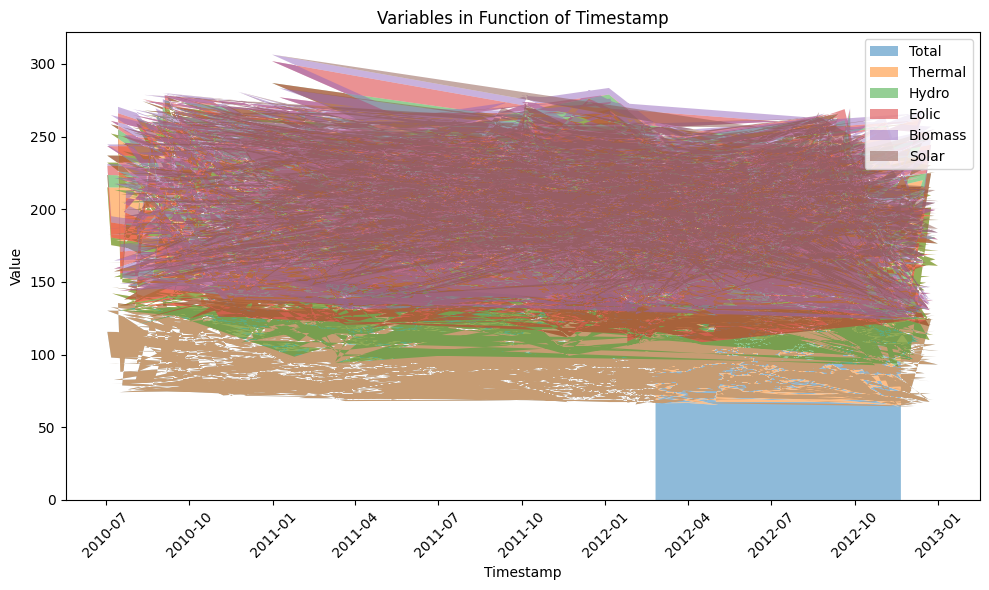

In [72]:
df_sorted = df.sort_values(by='tmstp')

# Tomar una muestra aleatoria sin reemplazo del 0.01% de los datos
df_sampled = df_sorted.sample(frac=0.01, replace=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Preparar los datos para stackplot
x = df_sampled['tmstp']
y_total = df_sampled['total']
y_thermal = df_sampled['thermal']
y_hydro = df_sampled['hydro']
y_eolic = df_sampled['eolic']
y_biomass = df_sampled['biomass']
y_solar = df_sampled['solar']

# Trazar por capas utilizando stackplot
ax.stackplot(x, y_total, y_thermal, y_hydro, y_eolic, y_biomass, y_solar, labels=['Total', 'Thermal', 'Hydro', 'Eolic', 'Biomass', 'Solar'], alpha=0.5, baseline='zero')

ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Variables in Function of Timestamp')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Paula\AppData\Local\Temp\ipykernel_8272\340954686.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


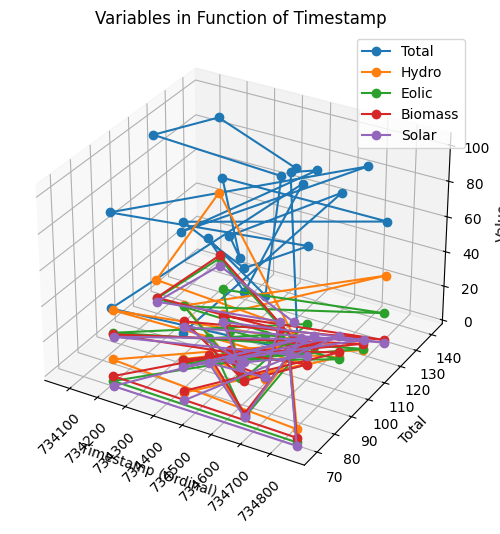

In [41]:
df = df.sample(frac=0.001)  # representación del 20%
df['tmstp_num'] = df['tmstp'].apply(lambda x: x.toordinal())  # Convertir a números enteros

df = df.sample(frac=0.2)  # representación del 20%

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['tmstp_num'], df['total'], df['thermal'], 'o-', label='Total')
ax.plot(df['tmstp_num'], df['total'], df['hydro'], 'o-', label='Hydro')
ax.plot(df['tmstp_num'], df['total'], df['eolic'], 'o-', label='Eolic')
ax.plot(df['tmstp_num'], df['total'], df['biomass'], 'o-', label='Biomass')
ax.plot(df['tmstp_num'], df['total'], df['solar'], 'o-', label='Solar')

ax.legend()
ax.set_xlabel('Timestamp (Ordinal)')
ax.set_ylabel('Total')
ax.set_zlabel('Value')
ax.set_title('Variables in Function of Timestamp')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

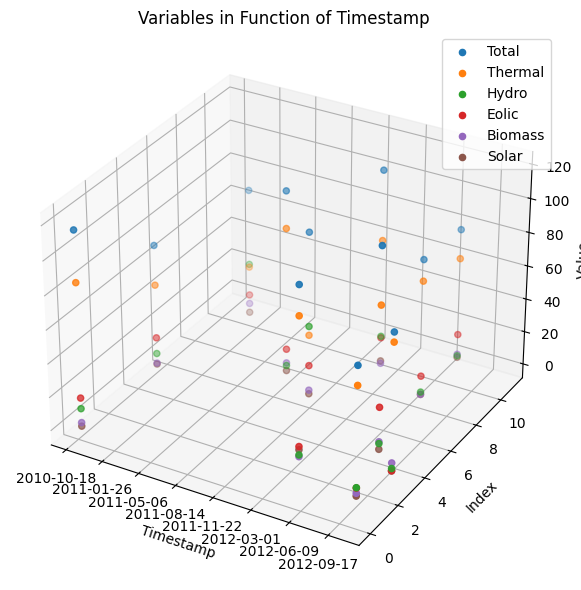

In [66]:
df_sorted = df.sort_values(by='tmstp')

# Tomar una muestra aleatoria sin reemplazo del 0.01% de los datos
df_sampled = df_sorted.sample(frac=0.0001, replace=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Convertir el tiempo a números enteros utilizando la función mdates.date2num
x = mdates.date2num(df_sampled['tmstp'])
y = range(len(df_sampled))
z_total = df_sampled['total']
z_thermal = df_sampled['thermal']
z_hydro = df_sampled['hydro']
z_eolic = df_sampled['eolic']
z_biomass = df_sampled['biomass']
z_solar = df_sampled['solar']

# Trazar los puntos para cada variable en un espacio 3D
ax.scatter(x, y, z_total, label='Total')
ax.scatter(x, y, z_thermal, label='Thermal')
ax.scatter(x, y, z_hydro, label='Hydro')
ax.scatter(x, y, z_eolic, label='Eolic')
ax.scatter(x, y, z_biomass, label='Biomass')
ax.scatter(x, y, z_solar, label='Solar')

# Formatear los ejes x con fechas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('Timestamp')
ax.set_ylabel('Index')
ax.set_zlabel('Value')
ax.set_title('Variables in Function of Timestamp')

ax.legend()

plt.tight_layout()
plt.show()